In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('telecom_imputed.csv')
df.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability,last_rech_6,last_rech_7,last_rech_8
0,0.0,109.0,0.0,0.0,0.0,31.277,87.009,7.527,48.58,124.38,...,0.0,0.0,1958.0,0.0,0.0,0.0,0.0,22.0,9.0,54.0
1,1.0,109.0,0.0,0.0,0.0,0.000,122.787,42.953,0.00,0.00,...,0.0,0.0,710.0,0.0,0.0,0.0,0.0,12.0,9.0,56.0
2,2.0,109.0,0.0,0.0,0.0,60.806,103.176,0.000,0.53,15.93,...,0.0,0.0,882.0,0.0,0.0,0.0,0.0,11.0,21.0,54.0
3,3.0,109.0,0.0,0.0,0.0,156.362,205.260,111.095,7.26,16.01,...,0.0,0.0,982.0,0.0,0.0,0.0,0.0,15.0,20.0,55.0
4,4.0,109.0,0.0,0.0,0.0,240.708,128.191,101.565,21.28,4.83,...,1.0,0.0,647.0,0.0,0.0,0.0,0.0,25.0,25.0,60.0


In [3]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.model_selection import train_test_split

In [4]:
y = df['churn_probability'].astype(int)
X = df.drop('churn_probability', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,last_rech_6,last_rech_7,last_rech_8
47338,47338.0,109.0,0.0,0.0,0.0,172.250,149.720,244.222,20.71,13.16,...,0.0,0.0,0.0,395.0,0.0,0.0,0.0,27.0,24.0,36.0
67455,67455.0,109.0,0.0,0.0,0.0,155.610,53.934,47.532,11.84,7.54,...,0.0,0.0,0.0,515.0,0.0,0.0,0.0,30.0,20.0,58.0
12308,12308.0,109.0,0.0,0.0,0.0,68.285,71.308,35.515,12.64,5.63,...,0.0,0.0,0.0,595.0,0.0,0.0,0.0,29.0,28.0,40.0
52334,52334.0,109.0,0.0,0.0,0.0,139.165,205.666,172.807,68.78,207.41,...,0.0,0.0,0.0,656.0,0.0,0.0,0.0,29.0,22.0,54.0
664,664.0,109.0,0.0,0.0,0.0,475.536,137.251,0.000,25.26,11.58,...,0.0,0.0,0.0,499.0,0.0,0.0,0.0,29.0,15.0,49.0


In [5]:
X_test.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,last_rech_6,last_rech_7,last_rech_8
57621,57621.0,109.0,0.0,0.0,0.0,1127.020,1363.096,421.153,365.19,402.24,...,0.0,0.0,0.0,669.0,0.00,0.00,0.00,29.0,30.0,59.0
39559,39559.0,109.0,0.0,0.0,0.0,517.241,407.339,426.689,112.28,126.01,...,0.0,0.0,0.0,464.0,107.79,916.29,1235.71,30.0,30.0,60.0
41415,41415.0,109.0,0.0,0.0,0.0,648.204,586.811,618.653,777.76,766.84,...,0.0,0.0,0.0,405.0,0.00,0.00,0.00,29.0,30.0,61.0
47731,47731.0,109.0,0.0,0.0,0.0,245.917,177.315,132.963,172.14,83.96,...,0.0,0.0,0.0,1240.0,0.00,0.00,0.00,29.0,29.0,61.0
64801,64801.0,109.0,0.0,0.0,0.0,891.619,765.631,920.688,475.13,419.36,...,0.0,0.0,0.0,1541.0,1239.80,496.45,271.36,29.0,28.0,61.0


In [6]:
from sklearn.decomposition import PCA

pca = Pipeline([
    ('scaler', StandardScaler()), ('pca', PCA())
])

X_pca = pca.fit_transform(X_train)

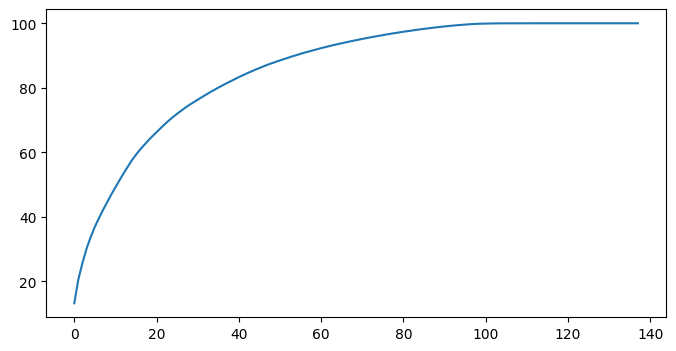

In [7]:
# extract pca model from pipeline
pca = pca.named_steps['pca']

# look at explainded variance of PCA components
evr_df = pd.DataFrame(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100)

# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(8,4)) 
plt.plot(cumulative_variance)

In [8]:
evr_df.iloc[60:80]

,0
60,92.29
61,92.62
62,92.93
63,93.24
64,93.53
65,93.82
66,94.10
67,94.37
68,94.64
69,94.90


#### Selecting 70 principal components with 95% Variance Explainability

In [10]:
pca = Pipeline([
    ('scaler', StandardScaler()), ('pca', PCA(n_components=70))
])
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [11]:
print(X_train_pca.shape)
print(X_test_pca.shape)

(55999, 70)
(14000, 70)


In [12]:
print(y_train.shape)
print(y_test.shape)

(55999,)
(14000,)


In [13]:
type(X_train_pca)

numpy.ndarray

In [14]:
y_train.value_counts()

churn_probability
0    50289
1     5710
Name: count, dtype: int64

## Modelling

In [16]:
from keras.layers import Input, Dense, BatchNormalization, Dropout
from keras.models import Sequential
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
from keras import callbacks
from keras.optimizers import Adadelta, RMSprop, SGD, Adam, Adagrad

In [17]:
#pip install -U keras-tuner
import keras_tuner as kt

In [18]:
def build_model(hp):
    model = Sequential()
    model.add(Input(shape=(70,)))

    for i in range(hp.Int('num_layers', min_value=1, max_value=20)):
        units = hp.Int('units'+str(i), min_value=10, max_value=120)
        model.add(Dense(units=units, activation=hp.Choice('activation'+str(i), values=['relu', 'tanh', 'sigmoid', 'LeakyRelu'])))
        model.add(Dropout(hp.Choice('dropout'+str(i), values=[0.0, 0.1, 0.2, 0.4, 0.7])))

    model.add(Dense(1, activation='sigmoid'))

    optimizer = hp.Choice('optimizer', values=['sgd', 'rmsprop', 'adam', 'adagrad', 'nadam'])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [19]:
tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=7, directory='tuning', project_name='layers_node_tune')

In [20]:
tuner.search(X_train_pca, y_train, epochs=7, validation_data=(X_test_pca, y_test))

Trial 7 Complete [00h 00m 01s]

Best val_accuracy So Far: 0.9252142906188965
Total elapsed time: 00h 02m 39s


In [21]:
tuner.get_best_hyperparameters()[0].values

{'num_layers': 3,
 'units0': 80,
 'activation0': 'relu',
 'dropout0': 0.4,
 'optimizer': 'nadam',
 'units1': 10,
 'activation1': 'relu',
 'dropout1': 0.0,
 'units2': 10,
 'activation2': 'relu',
 'dropout2': 0.0}

In [22]:
model = tuner.get_best_models(1)[0]
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 80)                  │           5,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 80)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             810 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 10)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,611 (25.82 KB)

 Trainable params: 6,611 (25.82 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_accuracy', mode='max',min_delta=0.001, verbose=1, patience=10,restore_best_weights=True)

In [24]:
def plot_performance(history):
    # Extract metrics from history
    history_saved = history
    epochs = np.arange(1, len(history.history['loss']) + 1)
    data = {
        'Epoch': epochs,
        'Training Loss': history.history['loss'],
        'Validation Loss': history.history['val_loss'],
        'Training Accuracy': history.history['accuracy'],
        'Validation Accuracy': history.history['val_accuracy']
    }
    
    df = pd.DataFrame(data)
    # Set Seaborn style
    sns.set(style="whitegrid")
    
    # Create a figure with subplots
    fig, axs = plt.subplots(1, 2, figsize=(10,5))

    plt.subplot(1,2,1)
    # Plot Training and Validation Loss
    sns.lineplot(x='Epoch', y='value', hue='variable', 
                 data=pd.melt(df[['Epoch', 'Training Loss', 'Validation Loss']], ['Epoch']))
    plt.title('Training and Validation Loss')

    plt.subplot(1,2,2)
    # Plot Training and Validation Accuracy
    sns.lineplot(x='Epoch', y='value', hue='variable', data=pd.melt(df[['Epoch', 'Training Accuracy', 'Validation Accuracy']], ['Epoch']))
    plt.title('Training and Validation Accuracy')
    
    # Adjust layout and show plot
    plt.tight_layout()

In [25]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from imblearn.metrics import sensitivity_specificity_support

def plot_auc_roc(y_test, y_pred):
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    
    # Compute AUC
    roc_auc = auc(fpr, tpr)
  
    print('ROC_AUC' ,roc_auc)
    print("AUC:    \t", round(roc_auc_score(y_test, y_pred),2))
    
    pfig, axs = plt.subplots(1, 2, figsize=(10,4))
    plt.subplot(1,2,1)
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--') 
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05]) #to have some space for the line graph 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    
    
    # Compute Youden's J statistic
    youden_index = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[youden_index]
    
    print(f'Optimal Threshold: {optimal_threshold}')
    
    y_pred_thres = np.where((y_pred>=optimal_threshold), 1, 0)

    cm = confusion_matrix(y_test, y_pred_thres)
    cm_pt = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]
    
    plt.subplot(1,2,2)
    sns.heatmap(cm_pt, annot=True, fmt='.2f', cmap='Blues', cbar=False)
    plt.show()

    print("Accuracy Score:\n", accuracy_score(y_test, y_pred_thres), end="\n\n")
    print("Recall Score:\n", recall_score(y_test, y_pred_thres), end="\n\n")
    print("Precision Score:\n", precision_score(y_test, y_pred_thres), end="\n\n")
    print("Classification Report:\n", classification_report(y_test, y_pred_thres), end="\n\n")

    # check sensitivity and specificity
    sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred_thres, average='binary')
    print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')
    
    print("\n\nConfusion Matrix:\n", cm, end="\n\n")

Epoch 6/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9217 - loss: 0.1936 - val_accuracy: 0.9254 - val_loss: 0.1852
Epoch 7/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9215 - loss: 0.1978 - val_accuracy: 0.9253 - val_loss: 0.1838
Epoch 8/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9244 - loss: 0.1874 - val_accuracy: 0.9269 - val_loss: 0.1827
Epoch 9/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9229 - loss: 0.1888 - val_accuracy: 0.9261 - val_loss: 0.1825
Epoch 10/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9246 - loss: 0.1886 - val_accuracy: 0.9270 - val_loss: 0.1803
Epoch 11/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9252 - loss: 0.1845 - val_accuracy: 0.9262 - val_loss: 0.1803
Epoch 12/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9259 - loss: 0.1828 - val_accuracy: 0.9253 - val_loss: 0.1799
Epoch 13/100
1750/1750 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9267 - los

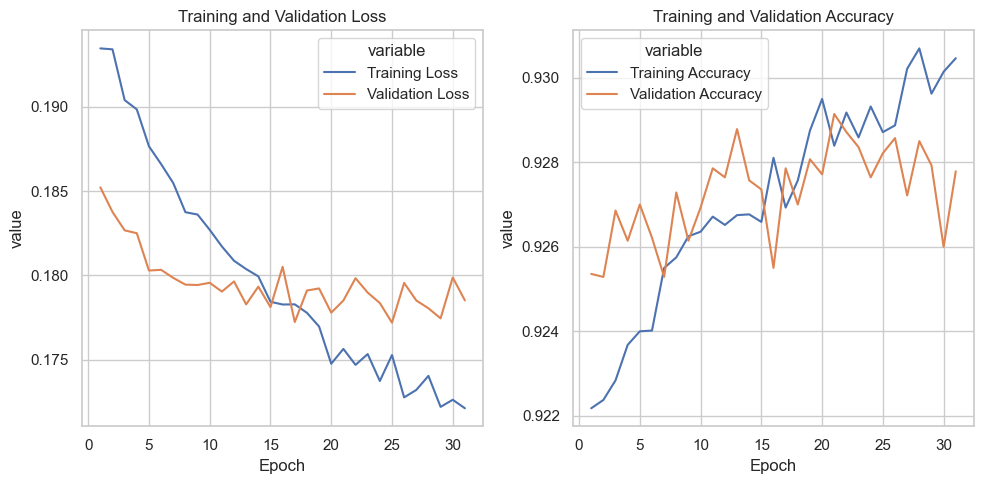

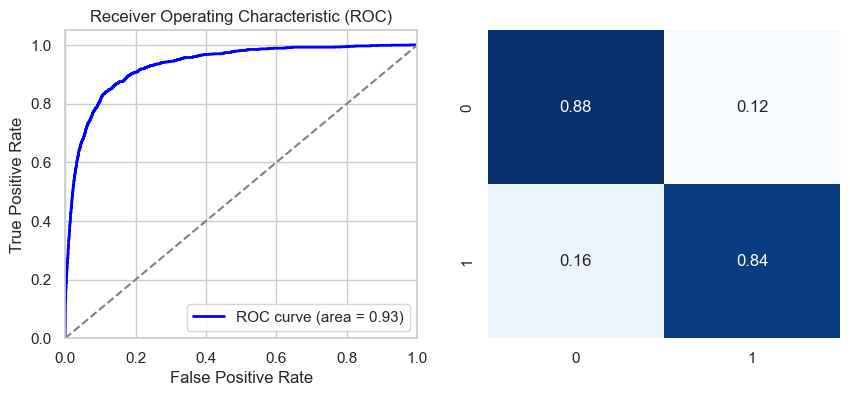

Accuracy Score:
 0.8795

Recall Score:
 0.840365682137834

Precision Score:
 0.4500941619585687

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93     12578
           1       0.45      0.84      0.59      1422

    accuracy                           0.88     14000
   macro avg       0.72      0.86      0.76     14000
weighted avg       0.93      0.88      0.89     14000


Sensitivity: 	0.84
Specificity: 	0.88


Confusion Matrix:
 [[11118  1460]
 [  227  1195]]



In [26]:
history = model.fit(X_train_pca, y_train, epochs=100, initial_epoch=5, validation_data=(X_test_pca, y_test), callbacks=[early_stop])

#Plotting the performace 
plot_performance(history)
#ROC-AUC curve
y_pred = model.predict(X_test_pca)
plot_auc_roc(y_test, y_pred)